Step 1 - Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 2 Import Data Set

In [2]:
#Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')

Step 3 - View Data for Statistical Inferences

In [3]:
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Dataset has two Columns. Mathematically we can represent Salary is a function of Experience
    Y -> f(X)
        Y is Salary
        X is Experience

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [5]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


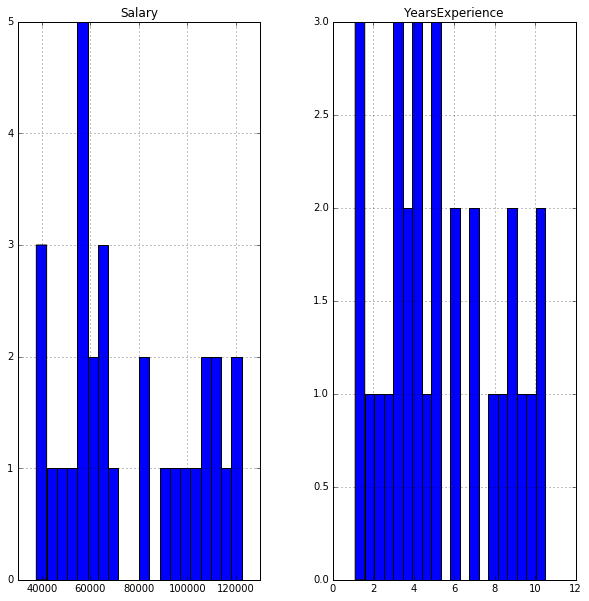

In [6]:
dataset.hist(bins=20, figsize=(10,10))
plt.show()

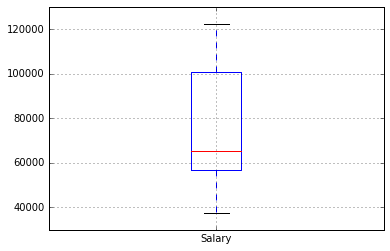

In [7]:
dataset.boxplot(column=['Salary'])

<b>Step 4 - Find Null Values</b>

In [8]:
dataset.isnull().values.any()

False

In [9]:
# There are no Null Values

In [10]:
dataset['YearsExperience'].value_counts()

4.0     2
3.2     2
9.6     1
6.8     1
2.0     1
3.0     1
4.5     1
6.0     1
9.0     1
9.5     1
10.5    1
5.9     1
8.7     1
3.7     1
4.1     1
5.1     1
2.2     1
7.1     1
8.2     1
7.9     1
2.9     1
1.3     1
10.3    1
3.9     1
1.1     1
5.3     1
4.9     1
1.5     1
Name: YearsExperience, dtype: int64

In [11]:
X = dataset.iloc[:, :-1].values # Matrix of features (Expirence)
y = dataset.iloc[:, 1].values # Dependent Varialbe (Salary)

<b>Step 5 -  Splitting the dataset into the Training set and Test set</b>

In [12]:
from sklearn.cross_validation import train_test_split

C:\Users\smattoo5\AppData\Local\Continuum\anaconda3\envs\sahilpython35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# Check Shape of all the newly created variables
print('Print Xtrain Dimension as',X_train.shape)
print('Print Ytrain Dimension as',y_train.shape)
print('Print Xtest Dimension as',X_test.shape)
print('Print Ytrain Dimension as',y_test.shape)

Print Xtrain Dimension as (20, 1)
Print Ytrain Dimension as (20,)
Print Xtest Dimension as (10, 1)
Print Ytrain Dimension as (10,)


Step 6 Train the Model

In [15]:
# Create the Model using Sklearn
from sklearn.linear_model import LinearRegression

In [16]:
# Create Instance of Linear Regression
model = LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Step 7 Predicting the Test set results

In [18]:
y_pred = model.predict(X_test) # Apply a Regressor Model on Test Data
y_pred

array([ 115814.30756236,   71511.92534771,  102617.85328566,
         75282.34085534,   55487.65944028,   60200.67882482,
        122412.53470072,  107330.8726702 ,   63028.49045554,
         35692.97802523])

In [19]:
y_test

array([ 112635.,   67938.,  113812.,   83088.,   64445.,   57189.,
        122391.,  109431.,   56957.,   39343.])

In [20]:
type(y_pred)

numpy.ndarray

In [21]:
YY = (y_pred-y_test)
YY

array([  3179.30756236,   3573.92534771, -11194.14671434,  -7805.65914466,
        -8957.34055972,   3011.67882482,     21.53470072,  -2100.1273298 ,
         6071.49045554,  -3650.02197477])

Step 8 Visuallize

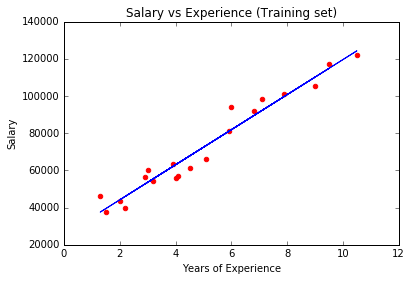

In [22]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

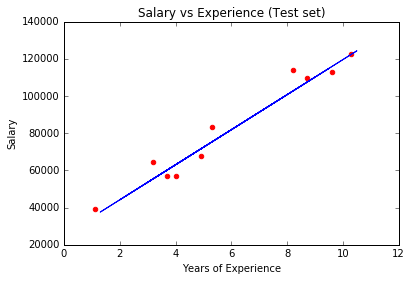

In [23]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [26]:
from statsmodels.api import add_constant
X2 = add_constant(X_train)
lm= sm.OLS(y_train,X2)
lm2=lm.fit()
lm2.pvalues

NameError: name 'sm' is not defined